# Chicago Crime Analysis for the Past Year (October 2018 - November 2019)

This analysis is based on crimes that span from October 2018 to November 2019. The analysis will take a look at the total number of crime committed, the type of crime, and the frequency of the offense during what time of hour and month. 

## Loading of Data and Libraries

The data is loaded into a dataframe with the use of Pandas. Other libraries used are numpy, seaborn for visualization, and matplotlib for plotting. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [4]:
df = pd.read_csv('ChicagoCrime.csv')

In [44]:
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,...,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Hour,Month,Day of Week,Date
0,JC355180,2018-11-14 00:01:00,035XX S MICHIGAN AVE,4650,OTHER OFFENSE,SEX OFFENDER: FAIL TO REGISTER,POLICE FACILITY/VEH PARKING LOT,N,N,213,...,26,NaN,NaN,NaN,NaN,NaN,0,11,Wed,2018-11-14
1,JB517463,2018-11-15 18:18:20,011XX W 31ST ST,2027,NARCOTICS,POSS: CRACK,APARTMENT,Y,N,913,...,18,NaN,NaN,NaN,NaN,NaN,18,11,Thu,2018-11-15
2,JC320782,2019-06-24 18:20:00,041XX S DREXEL BLVD,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),N,N,214,...,06,NaN,NaN,NaN,NaN,NaN,18,6,Mon,2019-06-24
3,JC270482,2019-05-19 11:00:00,018XX S WOOD ST,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,ATM (AUTOMATIC TELLER MACHINE),N,N,1234,...,11,NaN,NaN,NaN,NaN,NaN,11,5,Sun,2019-05-19
4,JC459410,2019-10-04 06:10:00,004XX S LA SALLE ST,0560,ASSAULT,SIMPLE,SIDEWALK,N,N,122,...,08A,NaN,NaN,NaN,NaN,NaN,6,10,Fri,2019-10-04


In [45]:
df['CASE#'].nunique()

259499

-Top 5 Beats with Crime

In [6]:
df['BEAT'].value_counts().head(5)

1834    3206
111     2497
1112    2375
112     2264
1831    2242
Name: BEAT, dtype: int64

In [7]:
# Top 5 Wards with Crime
df['WARD'].value_counts().head(5)

42.0    16543
28.0    12833
27.0    12481
24.0    10998
6.0      9643
Name: WARD, dtype: int64

In [8]:
# Primary Description of Crime
df[' PRIMARY DESCRIPTION'].value_counts()

THEFT                                62601
BATTERY                              49489
CRIMINAL DAMAGE                      26989
ASSAULT                              20681
DECEPTIVE PRACTICE                   17526
OTHER OFFENSE                        16888
NARCOTICS                            13910
BURGLARY                              9866
MOTOR VEHICLE THEFT                   9222
ROBBERY                               8248
CRIMINAL TRESPASS                     6820
WEAPONS VIOLATION                     6238
OFFENSE INVOLVING CHILDREN            2293
CRIM SEXUAL ASSAULT                   1608
PUBLIC PEACE VIOLATION                1577
INTERFERENCE WITH PUBLIC OFFICER      1522
SEX OFFENSE                           1202
PROSTITUTION                           700
HOMICIDE                               523
ARSON                                  366
LIQUOR LAW VIOLATION                   236
STALKING                               223
CONCEALED CARRY LICENSE VIOLATION      212
INTIMIDATIO

The dataframe consists of arrests crimes that have been committed in the time frame stated earlier. Each row represents a crime that has been committed and the columns include the type of crime, date, location aswell as other pertinent information. There have been 259499 crime that have taken place by the use of the *nunique* function. This has been applied to the **CASE** column since each crime has a unique case number applied to it. The next few methods display to top 5 beats and wards that crimes have been committed in. The list shown above displays each type of crime with the use of the column **PRIMARY DESCRIPTION** and the *value_counts* function to display the number of crimes in each type. 

## Visualization of Data

An array of plots will be used to visualize the data. The visualization will consist of bar and line plots as well as heat and cluster maps. This will help portray the history and type of crimes occuring throughout the allotted time frame. 

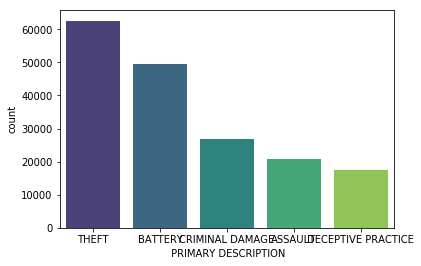

In [9]:
sns.countplot(x = ' PRIMARY DESCRIPTION',data = df , palette = 'viridis', order=df[' PRIMARY DESCRIPTION'].value_counts().iloc[:5].index)

With the use of seaborn, a bar plot has been portrayed to show the top 5 occurring crimes and how they fare in counts with eachother. To show how times affect the occurrence of crimes, the dataframe is updated with new columns representing the **Hour**, **Month**, and **Day** each crime. This in turn will help in determining the likelihood of what time a crime is committed. 

In [6]:
df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'])

In [7]:
df['Hour'] = df['DATE  OF OCCURRENCE'].apply(lambda time: time.hour)
df['Month'] = df['DATE  OF OCCURRENCE'].apply(lambda time: time.month)
df['Day of Week'] = df['DATE  OF OCCURRENCE'].apply(lambda time: time.dayofweek)

In [8]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [9]:
df['Day of Week'] = df['Day of Week'].map(dmap)

Since the **Date of Occurrence** column is a string type, it must be converted to DateTime objects to process the data. Hence the use of *pd.to_datetime* method is used. After the objects are converted, new columns are inserted for the Hour, Month, and Day of the week with the application of lambda function. Since the Days of the week are represented numerically, they have to be mapped out to their string counterparts by the name of the Day. After this process the data is ready for time analysis. 

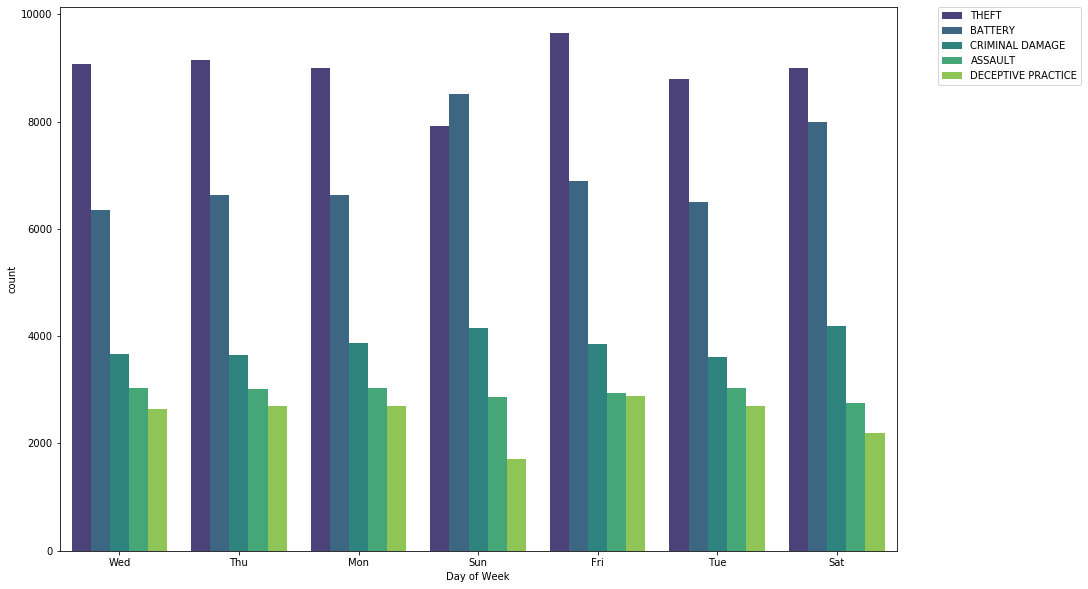

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(x = 'Day of Week', data=df, hue= ' PRIMARY DESCRIPTION', palette = 'viridis', hue_order = df[' PRIMARY DESCRIPTION'].value_counts().iloc[:5].index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

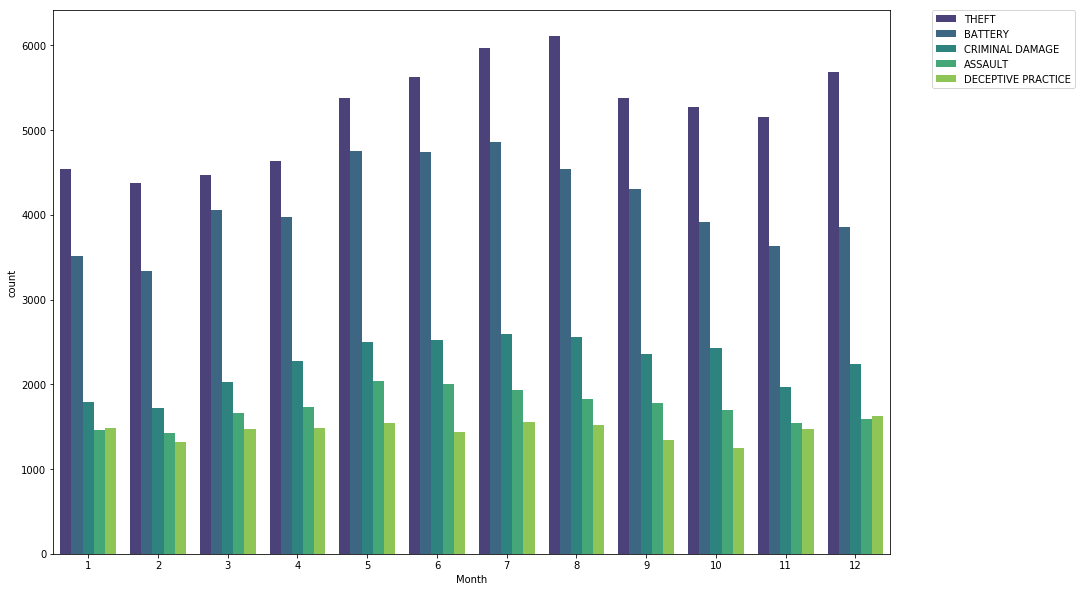

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(x = 'Month', data=df, hue= ' PRIMARY DESCRIPTION', palette = 'viridis', hue_order = df[' PRIMARY DESCRIPTION'].value_counts().iloc[:5].index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The count plot above indicate the amount of crimes in each category that have occurred in each day of the week and month. In almost all cases **THEFT** exhibited the most amount of occurrences each time. This was followed by **BATTERY** and so on. The plots are all focused on the top 5 crimes that take place in Chicago. By these plots it is easily seen that there is a substantial margin between the number 1 crime and number 3. This puts into perspective that theft is a great deal of concern in Chicago. 

## Line Plot Visualization

The data frame is then grouped by the months to portray the occurrences of crimes in each month. A groupby object is created called *byMonth* where the DataFrame is grouped by the month column. The *count()* method is used to aggregate the number of crimes. 

In [11]:
# Grouping by Month
byMonth = df.groupby('Month').count()
byMonth.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,,
1,19447,19447,19447,19447,19447,19447,19368,19447,19447,19447,19447,19447,19361,19361,19361,19361,19361,19447,19447
2,18232,18232,18232,18232,18232,18232,18136,18232,18232,18232,18232,18232,18134,18134,18134,18134,18134,18232,18232
3,20224,20224,20224,20224,20224,20224,20157,20224,20224,20224,20224,20224,20152,20152,20152,20152,20152,20224,20224
4,20782,20782,20782,20782,20782,20782,20688,20782,20782,20782,20779,20782,20704,20704,20704,20704,20704,20782,20782
5,23434,23434,23434,23434,23434,23434,23352,23434,23434,23434,23432,23434,23350,23350,23350,23350,23350,23434,23434


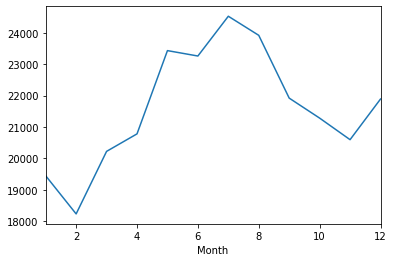

In [12]:
# Arrests per Month
byMonth['ARREST'].plot()

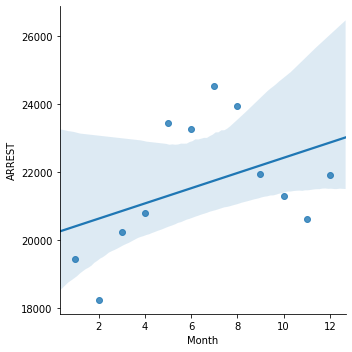

In [13]:
sns.lmplot(x='Month',y='ARREST', data=byMonth.reset_index())

The plots above show the number of crimes that have taken place in each month. There is a sharp increase from months 2 to 5. A linear model fit is applied which shows a linear regression. Although the shaded error is vast which indicates a wide chance of errors due to the inconsistencies of criminal activity. 

In [14]:
df['Date']=df['DATE  OF OCCURRENCE'].apply(lambda t: t.date())

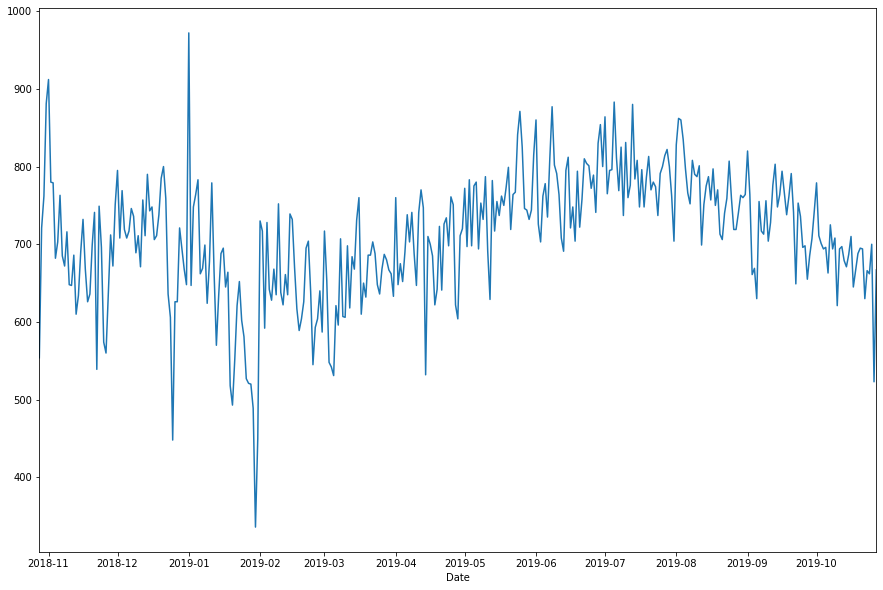

In [16]:
plt.figure(figsize=(15, 10))
df.groupby('Date').count()['ARREST'].plot()

Text(0.5, 1.0, 'THEFT OFFENSE')

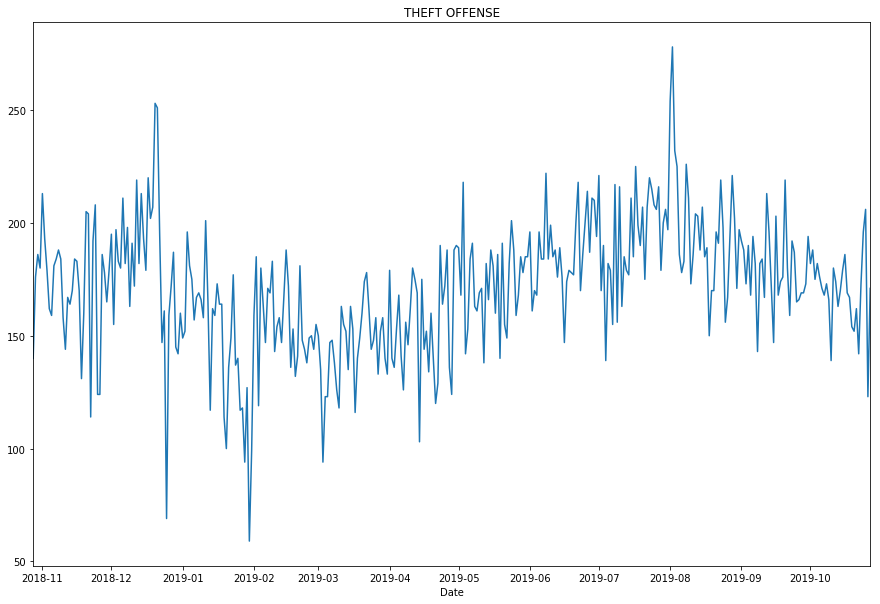

In [29]:
plt.figure(figsize=(15, 10))
df[df[' PRIMARY DESCRIPTION']=='THEFT'].groupby('Date').count()['DATE  OF OCCURRENCE'].plot()
plt.title('THEFT OFFENSE')

Text(0.5, 1.0, 'BATTERY OFFENSE')

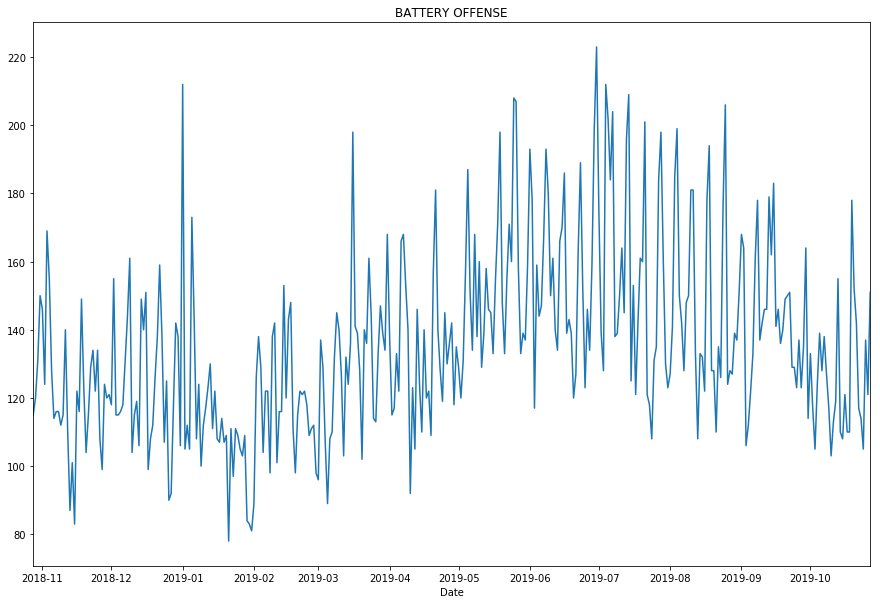

In [31]:
plt.figure(figsize=(15, 10))
df[df[' PRIMARY DESCRIPTION']=='BATTERY'].groupby('Date').count()['DATE  OF OCCURRENCE'].plot()
plt.title('BATTERY OFFENSE')

Text(0.5, 1.0, 'CRIMINAL DAMAGE OFFENSE')

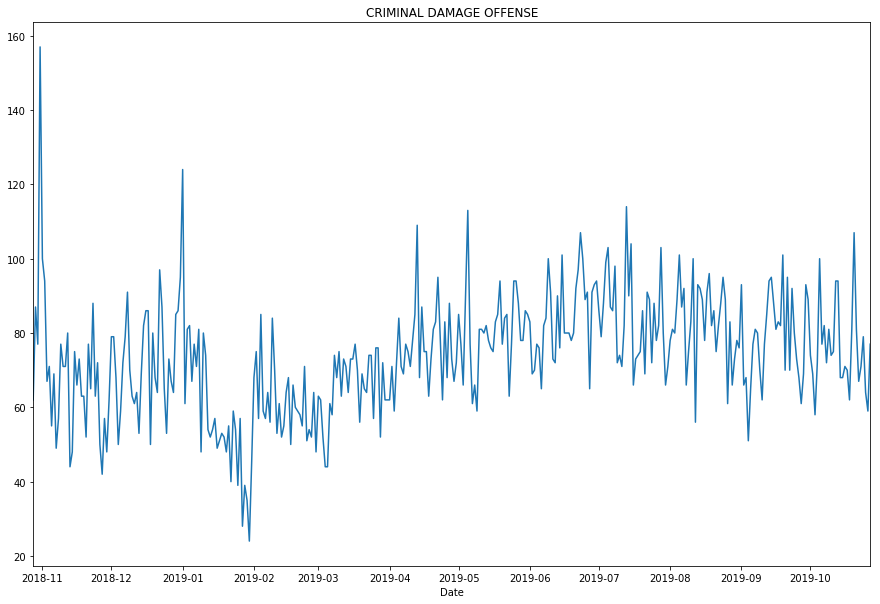

In [33]:
plt.figure(figsize=(15, 10))
df[df[' PRIMARY DESCRIPTION']=='CRIMINAL DAMAGE'].groupby('Date').count()['DATE  OF OCCURRENCE'].plot()
plt.title('CRIMINAL DAMAGE OFFENSE')

Text(0.5, 1.0, 'ASSAULT OFFENSE')

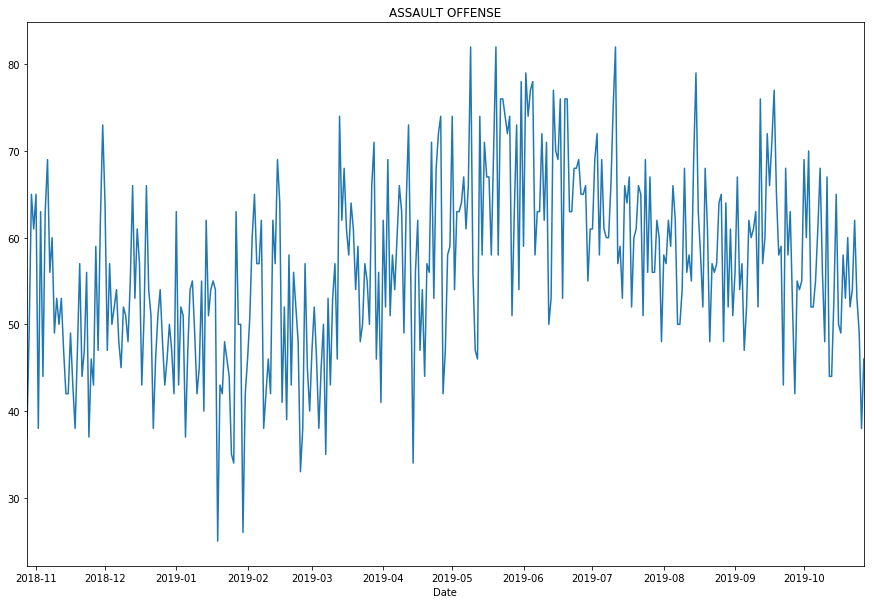

In [34]:
plt.figure(figsize=(15, 10))
df[df[' PRIMARY DESCRIPTION']=='ASSAULT'].groupby('Date').count()['DATE  OF OCCURRENCE'].plot()
plt.title('ASSAULT OFFENSE')

Text(0.5, 1.0, 'DECEPTIVE PRACTICE OFFENSE')

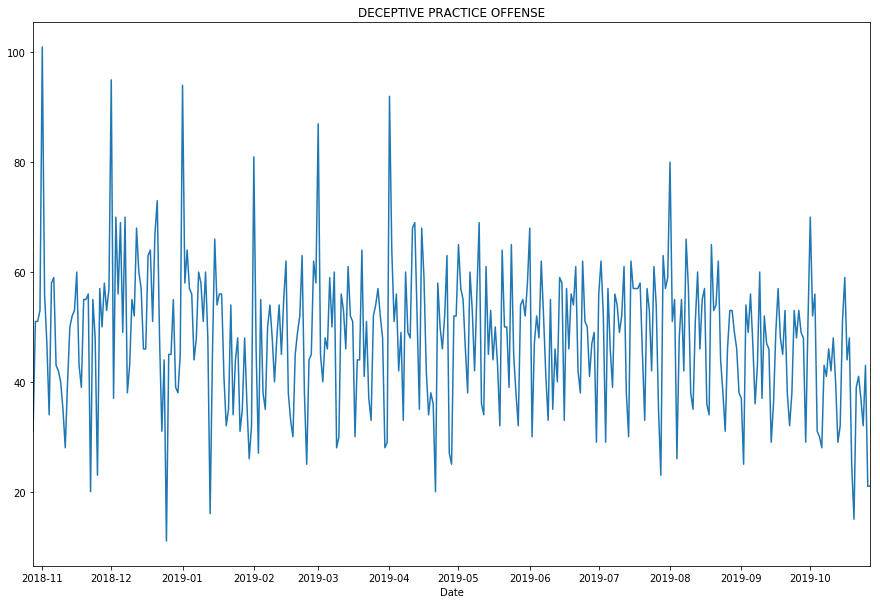

In [35]:
plt.figure(figsize=(15, 10))
df[df[' PRIMARY DESCRIPTION']=='DECEPTIVE PRACTICE'].groupby('Date').count()['DATE  OF OCCURRENCE'].plot()
plt.title('DECEPTIVE PRACTICE OFFENSE')

Text(0.5, 1.0, 'NARCOTICS OFFENSE')

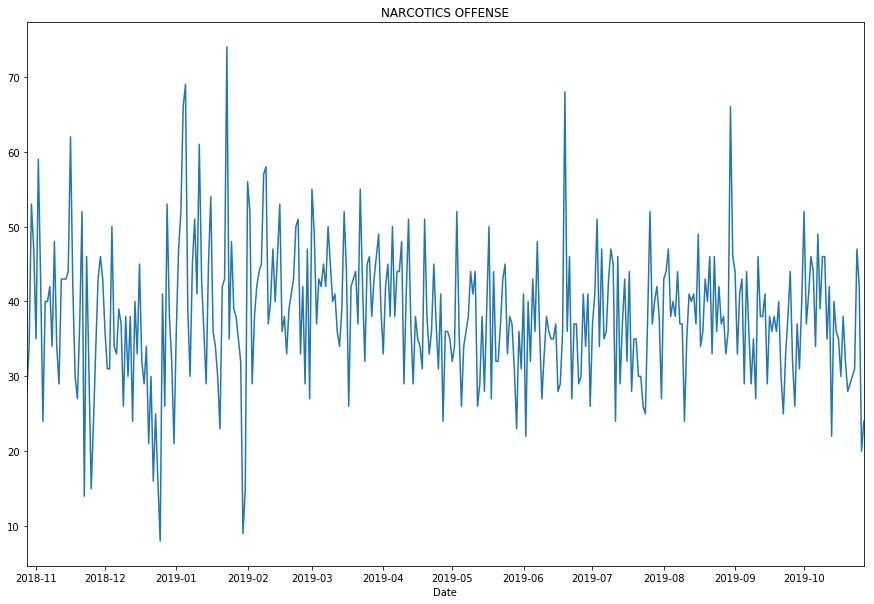

In [36]:
plt.figure(figsize=(15, 10))
df[df[' PRIMARY DESCRIPTION']=='NARCOTICS'].groupby('Date').count()['DATE  OF OCCURRENCE'].plot()
plt.title('NARCOTICS OFFENSE')

The above plots show the frequency of 6 crimes occuring throughout the past 12 months. 

## Heat Maps/ Cluster Maps

In order to display heat and cluster maps the data had to be grouped by the hour and day of the week. With a new object *dayHour*, the DataFrame is represented with the days of the week and the hours in a day. 

In [37]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()[' PRIMARY DESCRIPTION'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1753,1111,854,653,520,506,639,934,1346,1795,...,1990,2154,2146,2258,2213,2334,2150,2026,1970,1764
Mon,1747,1013,875,711,548,511,657,923,1461,1717,...,1950,2065,2077,2086,2151,2014,1941,1726,1629,1305
Sat,2040,1594,1361,1086,927,636,653,701,990,1489,...,1887,1943,1918,1893,1988,2152,2010,1915,1986,1851
Sun,1980,1587,1556,1361,1023,787,680,704,917,1228,...,1717,1779,1790,1888,1945,1982,1832,1811,1840,1528
Thu,1508,890,782,605,482,453,648,1005,1427,1724,...,1947,2160,2134,2119,2118,2117,1938,1717,1749,1461


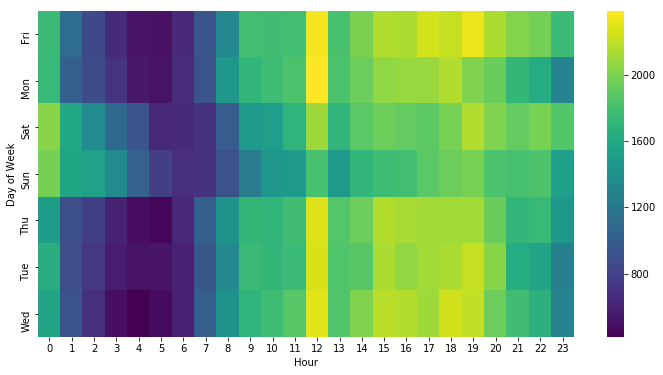

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

In the heat map depicted above it can be inferred that the frequency of crimes is most present between the hours of 12 and 20. 

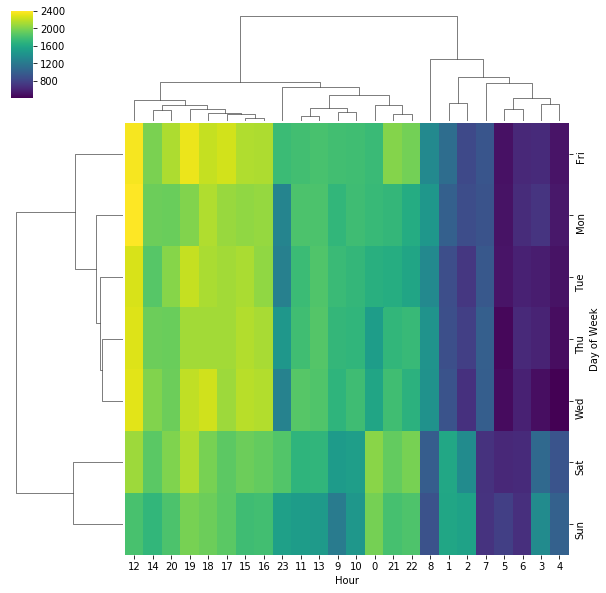

In [40]:
sns.clustermap(dayHour, cmap='viridis')

In [41]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()[' PRIMARY DESCRIPTION'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,2788,2801,3525,2853,3988,3193,3245,3928,3004,2754,3728,3057
Mon,2375,2532,2526,3648,3107,3043,4077,2985,3809,2811,2585,3440
Sat,2492,2778,3371,2830,3010,4213,3318,4015,2891,2604,2791,3728
Sun,2246,2392,3045,2480,3002,3853,3145,3145,3653,3258,2529,3449
Thu,3123,2689,2630,2776,3677,2889,3095,3926,2866,2629,3485,2839


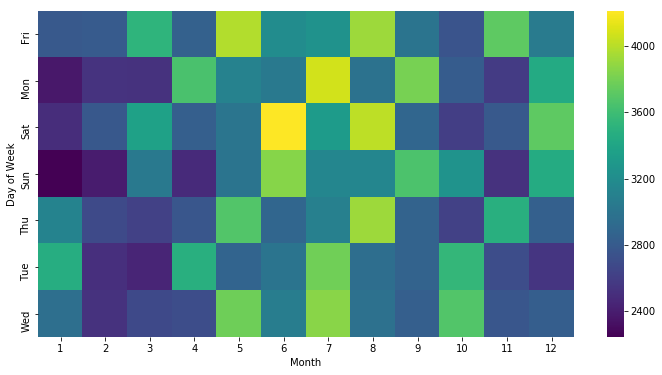

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

This heatmap represents crimes by month and it indicates that months 5 to 8 have to most crime activity. 